# Support Vector Machine


A Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression tasks. In simple terms, it works by finding the best possible decision boundary (or hyperplane) that separates different classes in a dataset. The "support vectors" are the data points closest to this boundary, influencing its position.

SVM aims to maximize the margin between classes, which is the distance between the decision boundary and the nearest data points of each class. This helps improve the model's generalization to new, unseen data.

## Gamma

In Support Vector Machines (SVM), the parameter "gamma" is a crucial hyperparameter that influences the shape of the decision boundary. It specifically defines how far the influence of a single training example reaches. 

### High Gamma

High gamma tries to separata the data into two part by curved lines. Which more complex hence, efficient and promising.

### Low Gamma

Decision boundary in simple and most likely to be linear. But sometimes it can have accuracy issue.

## Regularization

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization of a model to new, unseen data. Overfitting occurs when a model learns the training data too well, capturing noise and specific details that don't generalize well to other data. 

### High Regularization

Descision boundary is too overfitting but avoid the classification error.

### Low Regularization

After classifying the datas with a descision boundary there may have some classification error. But it is negligible.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Using a data frame to visulaize the data easily.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Creating a target column.
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Here, setosa == 0, versicolor==1, virginica==2

In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

From 'target' column we generate a new column 'flower_name'. We can do it using apply function. 

lamba is a transformation function. For each value in 'target' column 'lambda' returns the index off the 'target_names' column and stores it into the flower_name column.

#### Say, for value 2 in 'target' column, 'virginica' will be placed into flower_name column.

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Visualisation

In [9]:
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline

In [11]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [12]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


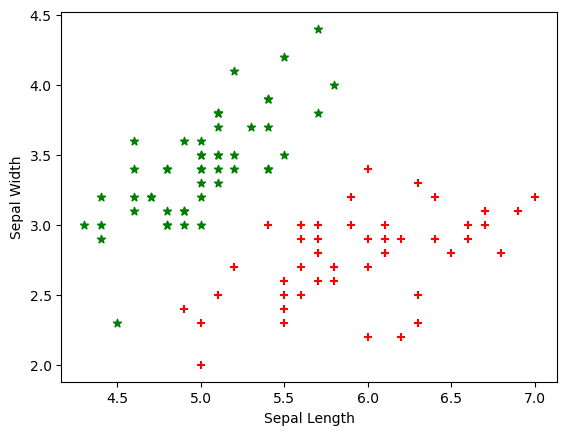

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='+')

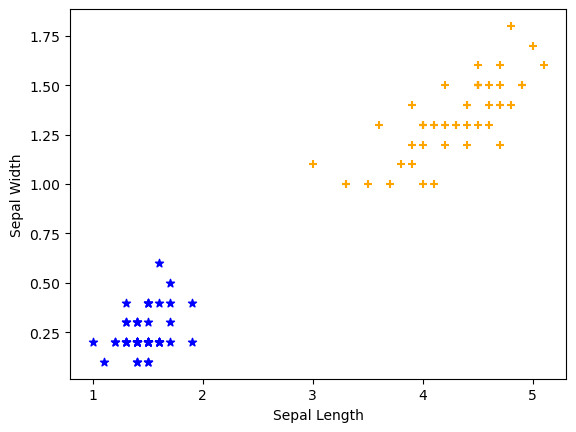

In [14]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='orange', marker='+')

# Training the model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['target', 'flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
Y = df.target
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
len(X_train)

120

In [20]:
len(X_test)

30

In [21]:
from sklearn.svm import SVC
model = SVC()

# Parameters of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

In [22]:
model.fit(X_train, Y_train)

SVC()

In [23]:
print(f"Accuracy is: {model.score(X_test, Y_test)*100} %")

Accuracy is: 96.66666666666667 %


## Affects on accuracy after tuning parameters.

### 1) Regularization (C)

In [24]:
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
print(f"Accuracy is before tuning Regularization: {model_C.score(X_test, Y_test)*100} %")

Accuracy is before tuning Regularization: 96.66666666666667 %


In [25]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
print(f"Accuracy is after tuning Regularization: {model_C.score(X_test, Y_test)*100} %")

Accuracy is after tuning Regularization: 96.66666666666667 %


## 2) Gamma

In [27]:
model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
print(f"Accuracy is after tuning gamma: {model_g.score(X_test, Y_test)*100} %")

Accuracy is after tuning gamma: 93.33333333333333 %


## 3) Kernel

In [29]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, Y_train)
print(f"Accuracy is after tuning kernel: {model_linear_kernel.score(X_test, Y_test)*100} %")

Accuracy is after tuning kernel: 96.66666666666667 %
